## Heart Disease prediction by Muhammad Suleman, Data Science Consultant

In [5]:
# Import necessary libraries

# Data analysis libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifiers
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# !pip install xgboost
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")



In [6]:
# Load the dataset

df = pd.read_csv(r'C:\Users\PC\Downloads\heart.csv')

In [7]:
# View first 5 rows of the dataset

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Data Dictionary
- age: age of the patient (numeric)
- sex: gender of the patient (binary: 0 = "female", 1 = "male")
- cp: type of chest pain experienced by the patient (categorical: 0 = "typical angina", 1 = "atypical angina", 2 = "non-anginal pain", 3 = "asymptomatic")
- trestbps: resting blood pressure of the patient (mm Hg, numeric)
- chol: serum cholesterol levels of the patient (mg/dL, numeric)
- fbs: fasting blood sugar levels of the patient (binary: 0 = "less than 120 mg/dL", 1 = "greater than or equal to 120 mg/dL")
- restecg: resting electrocardiographic results of the patient (categorical: 0 = "normal", 1 = "ST-T wave abnormality", 2 = "left ventricular hypertrophy")
- thalach: maximum heart rate achieved by the patient during exercise (numeric)
- exang: whether the patient experienced angina during exercise (binary: 0 = "no", 1 = "yes")
- oldpeak: ST depression induced by exercise relative to rest (numeric)
- slope: slope of the peak exercise ST segment (categorical: 0 = "upsloping", 1 = "flat", 2 = "downsloping")
- ca: number of major vessels colored by fluoroscopy (numeric)
- thal: type of thalassemia present in the patient (categorical: 0 = "normal", 1 = "fixed defect", 2 = "reversible defect")
- target: presence of heart disease in the patient (binary: 0 = "no", 1 = "yes")
    
##### This data dictionary provides a description of each variable in the dataset, along with its data type and possible values. It can help you better understand the data and choose appropriate preprocessing and modeling techniques.

In [8]:
# Rename column headers

df.columns = ['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Rest_ECG', 'Max_Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'ST_Slope', 'Number_of_Major_Vessels', 'Thalassemia_Type', 'Target']

In [9]:
# Looks much better now

df.head()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,ST_Slope,Number_of_Major_Vessels,Thalassemia_Type,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Data Verification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_Pain_Type          303 non-null    int64  
 3   Resting_Blood_Pressure   303 non-null    int64  
 4   Serum_Cholesterol        303 non-null    int64  
 5   Fasting_Blood_Sugar      303 non-null    int64  
 6   Rest_ECG                 303 non-null    int64  
 7   Max_Heart_Rate_Achieved  303 non-null    int64  
 8   Exercise_Induced_Angina  303 non-null    int64  
 9   ST_Depression            303 non-null    float64
 10  ST_Slope                 303 non-null    int64  
 11  Number_of_Major_Vessels  303 non-null    int64  
 12  Thalassemia_Type         303 non-null    int64  
 13  Target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [11]:
# statistical analysis of feature

df.describe()


,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,ST_Slope,Number_of_Major_Vessels,Thalassemia_Type,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Age                        0
Sex                        0
Chest_Pain_Type            0
Resting_Blood_Pressure     0
Serum_Cholesterol          0
Fasting_Blood_Sugar        0
Rest_ECG                   0
Max_Heart_Rate_Achieved    0
Exercise_Induced_Angina    0
ST_Depression              0
ST_Slope                   0
Number_of_Major_Vessels    0
Thalassemia_Type           0
Target                     0
dtype: int64


<AxesSubplot:>

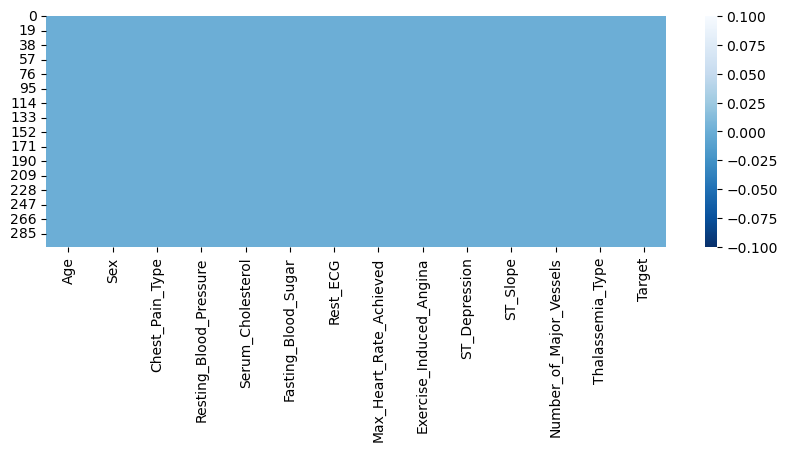

In [12]:
# Check for missing values in the dataframe
missing_values_count = df.isnull().sum()
print(missing_values_count)


# Visualize missing values using a heatmap
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(),cbar = True, cmap = "Blues_r")


#### 
- From the visual above, there are no missing values in the data and we are good to go


## Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [13]:
# call out each column header

df.columns

Index(['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure',
       'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Rest_ECG',
       'Max_Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression',
       'ST_Slope', 'Number_of_Major_Vessels', 'Thalassemia_Type', 'Target'],
      dtype='object')

<AxesSubplot:ylabel='Thalassemia_Type'>

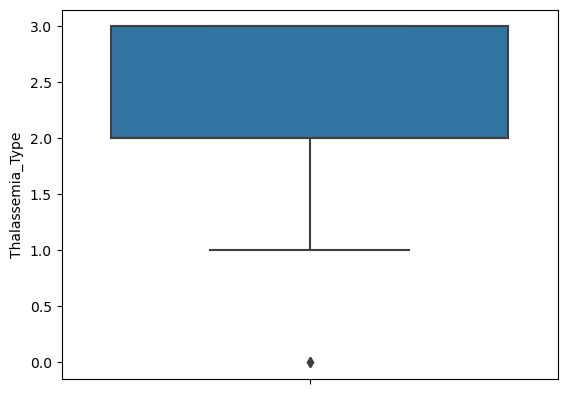

In [14]:
# Identify Outliers in 'Thalassemia_Type'

sns.boxplot(y=df['Thalassemia_Type'])

<AxesSubplot:ylabel='Resting_Blood_Pressure'>

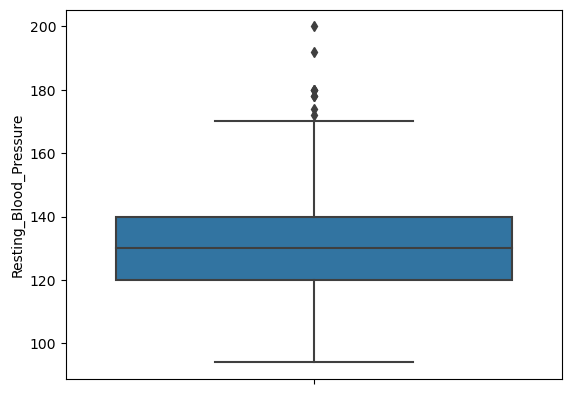

In [15]:
# Identify Outliers in 'Resting_Blood_Pressure'

sns.boxplot(y=df['Resting_Blood_Pressure'])


###
- The visuals above show that there a couple of outliers in several features in the data

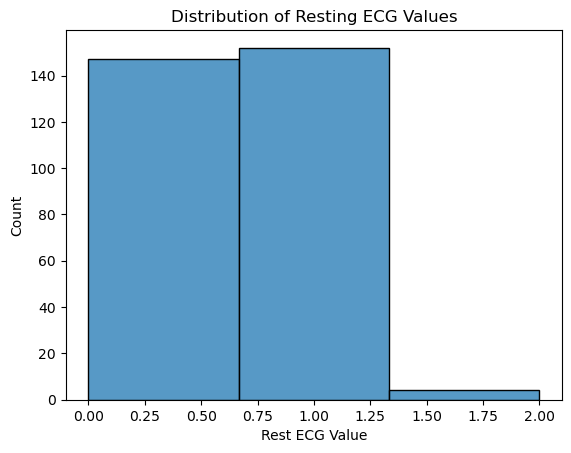

In [16]:
# Create a histogram of Rest ECG values
sns.histplot(data=df, x='Rest_ECG', bins=3)

# Add a title and axis labels
plt.title('Distribution of Resting ECG Values')
plt.xlabel('Rest ECG Value')
plt.ylabel('Count')

# Show the plot
plt.show()

####
- After creating a histogram of the Rest ECG values, I observed that the distribution was right-skewed. This means that most of the Rest ECG values in the dataset were on the lower end of the scale, with a few very high values that were much higher than the majority of the values.

- This skewness has important implications for any statistical analyses or machine learning models that we might want to run on this data. For example, if we were to calculate the mean Rest ECG value for the dataset, this value would be influenced by the few very high values at the right end of the distribution. This means that the mean may not accurately represent the central tendency of the data, and other measures like the median or mode may be more appropriate.

- Similarly, if we were to build a machine learning model to predict the target variable based on the Rest ECG data, the presence of outliers on the high end of the distribution could negatively impact the accuracy of our model. Therefore, we may need to take steps to address this skewness, such as removing outliers or transforming the data to a more normal distribution.






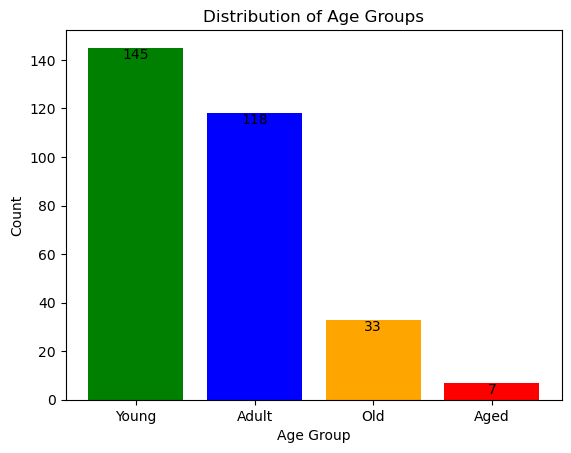

In [17]:
# Putiing age into 4 categories and visualizing
def age_group(Age):
    if Age <= 35:
        return 'Young'
    elif Age <= 55:
        return 'Adult'
    elif Age <= 65:
        return 'Old'
    else:
        return 'Aged'

# Apply the age_group function to the 'Age' column
df['Age_group'] = df['Age'].apply(age_group)

# Count the number of people in each age group
counts = df['Age_group'].value_counts()

# Plot the counts using a bar plot
labels = ['Young', 'Adult', 'Old', 'Aged']
colors = ['green', 'blue', 'orange', 'red']
plt.bar(labels, counts, color=colors)

# Add data labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='top')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.show()


###
- Bulk of the dtaa points are the young and adult categoy. This means that the age range for most of he patients in this Hospital fall within ages 29 to 55

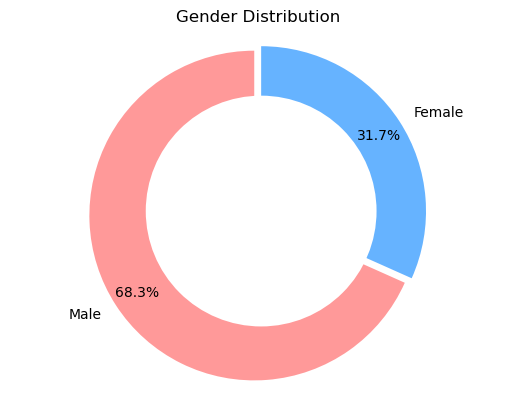

In [18]:
# Define a function to convert sex values to "male" or "female"
def gender(Sex):
    if Sex == 1:
        return "Male"
    else:
        return "Female"


# Apply the gender function to the sex column
df['Sex'] = df['Sex'].apply(gender)

# Count the number of males and females in the DataFrame
male_count = df[df['Sex'] == 'Male'].shape[0]
female_count = df[df['Sex'] == 'Female'].shape[0]

# Create a doughnut plot of the counts
labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['#FF9999', '#66B3FF']
explode = (0.05, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.title('Gender Distribution')
plt.show()

###
- For every woman in the hospital, there are approximately twice more men.

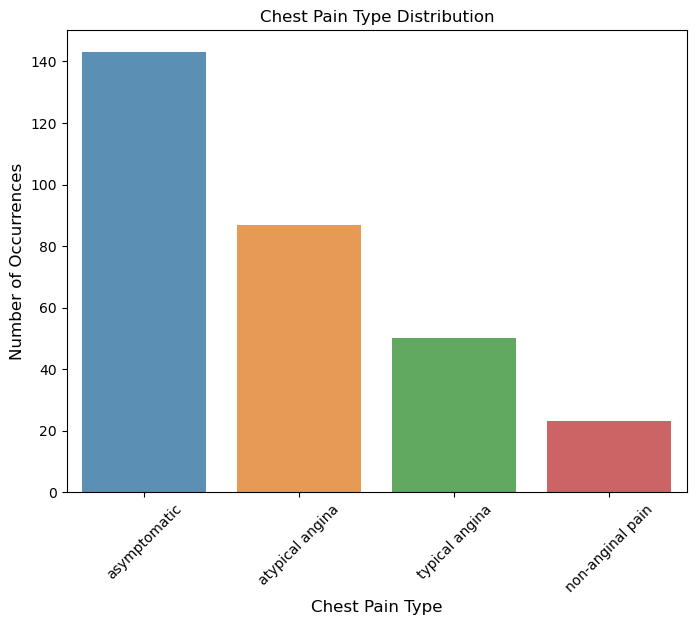

In [19]:
# Chest pain analysis

def chest_pain(Chest_Pain_Type):
    if Chest_Pain_Type == 1:
        return "typical angina"
    elif Chest_Pain_Type == 2:
        return "atypical angina"
    elif Chest_Pain_Type == 3:
        return "non-anginal pain"
    else:
        return "asymptomatic"

df["Chest_Pain_Type"] = df["Chest_Pain_Type"].apply(chest_pain)


cp_count = df["Chest_Pain_Type"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(cp_count.index, cp_count.values, alpha=0.8)
plt.title("Chest Pain Type Distribution")
plt.ylabel("Number of Occurrences", fontsize=12)
plt.xlabel("Chest Pain Type", fontsize=12)
plt.xticks(rotation=45)
plt.show()



###
- The asymptomaic chest pain is the most common of all types of chest pain, while non-anginal pain is the least common.

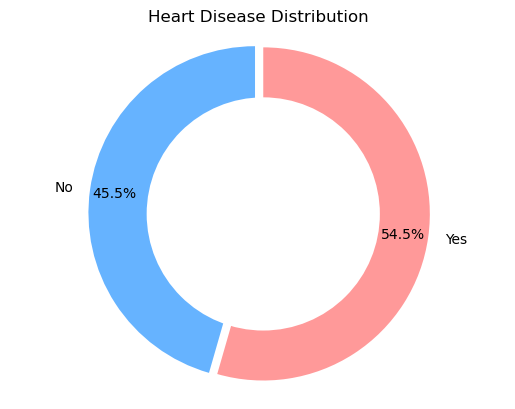

In [20]:
# Proportion of patients with and without heart disease.

# Define a function to convert target values to "No" or "Yes"
def heart_disease(Target):
    if Target == 0:
        return "No"
    else:
        return "Yes"

# Apply the heart_disease function to the target column
df['Target'] = df['Target'].apply(heart_disease)

# Count the number of people with and without heart disease in the DataFrame
no_count = df[df['Target'] == 'No'].shape[0]
yes_count = df[df['Target'] == 'Yes'].shape[0]

# Create a doughnut plot of the counts
labels = ['No', 'Yes']
sizes = [no_count, yes_count]
colors = ['#66B3FF', '#FF9999']
explode = (0.05, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.title('Heart Disease Distribution')
plt.show()


###
- The number of patients diagnosed with a heart disease is slighltly more than those without a heart disease.

## Bi variate analysis

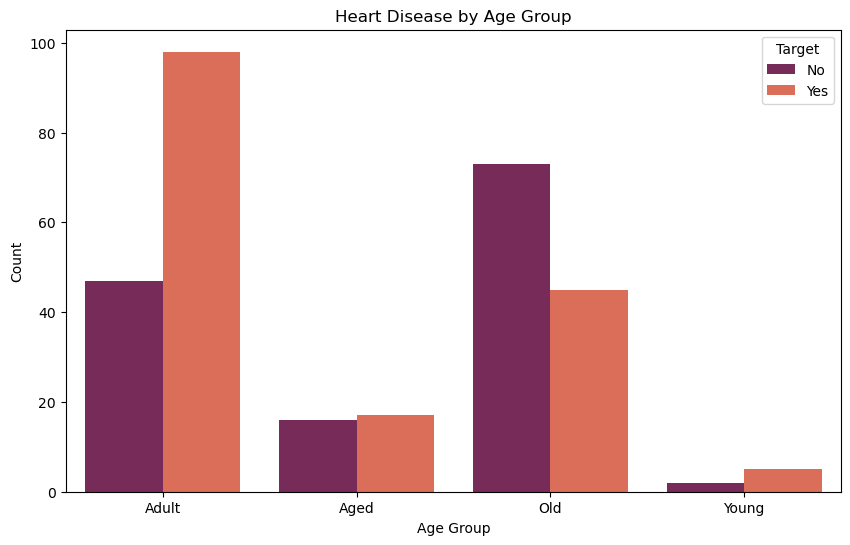

In [21]:
# Heart disease distribution across the age gropus

# Group the data by age_group and target, and count the occurrences
df_grouped = df.groupby(['Age_group', 'Target']).size().reset_index(name='count')

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_group', y='count', hue='Target', data=df_grouped, palette='rocket')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Heart Disease by Age Group')
plt.show()


###
- Although patients in the "young" category have the highest population, It is quite surprising to discover from the data that they have the least case of heart disease diagnosis.

In [22]:
df.head()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,ST_Slope,Number_of_Major_Vessels,Thalassemia_Type,Target,Age_group
0,63,Male,non-anginal pain,145,233,1,0,150,0,2.3,0,0,1,Yes,Old
1,37,Male,atypical angina,130,250,0,1,187,0,3.5,0,0,2,Yes,Adult
2,41,Female,typical angina,130,204,0,0,172,0,1.4,2,0,2,Yes,Adult
3,56,Male,typical angina,120,236,0,1,178,0,0.8,2,0,2,Yes,Old
4,57,Female,asymptomatic,120,354,0,1,163,1,0.6,2,0,2,Yes,Old


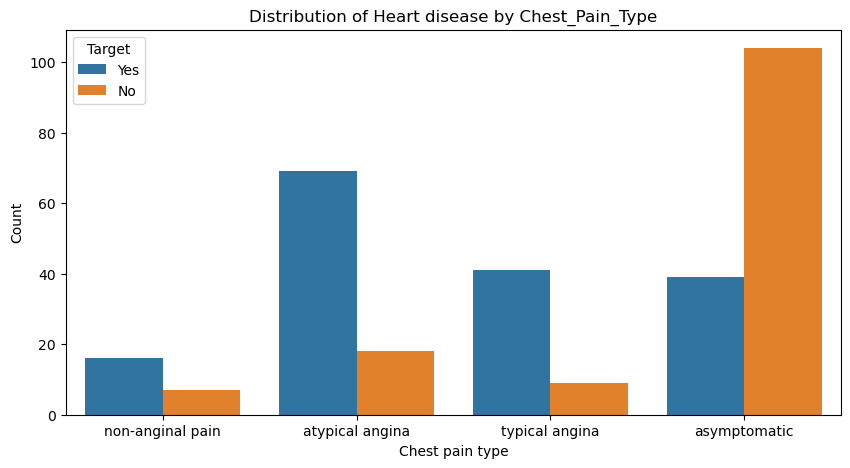

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot (x= 'Chest_Pain_Type', data=df, hue='Target')
plt.xlabel ('Chest pain type')
plt.ylabel ('Count')
plt.title ('Distribution of Heart disease by Chest_Pain_Type')

plt.show()

In [24]:
male_count


207

## Multi variate analysis



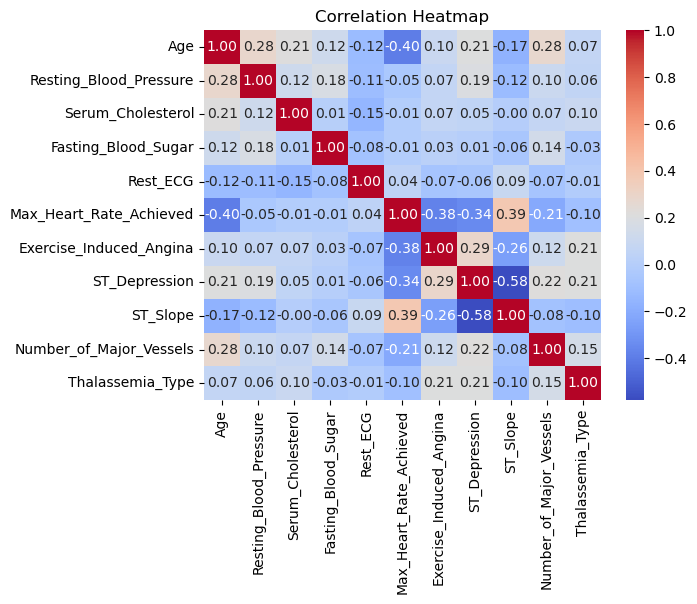

In [25]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

###
- See how the various features are related.
- It appears that there is a relatively significant negative correlation between ST_Depression (ST depression induced by exercise relative to rest) and ST_Slope: slope of the peak exercise ST segment (categorical: "upsloping", "flat", or "downsloping"))

In [26]:
# install powerbi client

!pip install powerbiclient



## Machine Learning

--Data Preprocessing

In [81]:
# reload dataset

df = pd.read_csv(r'C:\Users\PC\Downloads\heart.csv')

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
# rename header

df.columns = ['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Rest_ECG', 'Max_Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'ST_Slope', 'Number_of_Major_Vessels', 'Thalassemia_Type', 'Target']

In [84]:
df.head()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,ST_Slope,Number_of_Major_Vessels,Thalassemia_Type,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
# Remove the "Target column"
df1 = df[['Age', 'Sex', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Rest_ECG', 'Max_Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'ST_Slope', 'Number_of_Major_Vessels', 'Thalassemia_Type']]

label = df[['Target']]

In [86]:
df1.head()

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,ST_Slope,Number_of_Major_Vessels,Thalassemia_Type
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [87]:
label.head()

,Target
0,1
1,1
2,1
3,1
4,1


In [88]:
#  Verify that your features are all numerical data types.

df1.dtypes

Age                          int64
Sex                          int64
Chest_Pain_Type              int64
Resting_Blood_Pressure       int64
Serum_Cholesterol            int64
Fasting_Blood_Sugar          int64
Rest_ECG                     int64
Max_Heart_Rate_Achieved      int64
Exercise_Induced_Angina      int64
ST_Depression              float64
ST_Slope                     int64
Number_of_Major_Vessels      int64
Thalassemia_Type             int64
dtype: object

In [89]:
# Scale columns to -1 to 1.

# Define the columns to be scaled
cols_to_scale = ['Resting_Blood_Pressure', 'Serum_Cholesterol', 'Thalassemia_Type', 'Max_Heart_Rate_Achieved']

# Initialize the scaler object
scaler = MinMaxScaler(feature_range=(-1, 1))

# Scale the selected columns and store them in new columns
for col in cols_to_scale:
    df1[col+'_sc'] = scaler.fit_transform(df1[[col]])

# Drop the original columns from the DataFrame
df2 = df1.drop(cols_to_scale, axis=1)



In [98]:
# View the data

df2.head()

,Age,Sex,Chest_Pain_Type,Fasting_Blood_Sugar,Rest_ECG,Exercise_Induced_Angina,ST_Depression,ST_Slope,Number_of_Major_Vessels,Resting_Blood_Pressure_sc,Serum_Cholesterol_sc,Thalassemia_Type_sc,Max_Heart_Rate_Achieved_sc
0,63,1,3,1,0,0,2.3,0,0,-0.037736,-0.511416,-0.333333,0.206107
1,37,1,2,0,1,0,3.5,0,0,-0.320755,-0.433790,0.333333,0.770992
2,41,0,1,0,0,0,1.4,2,0,-0.320755,-0.643836,0.333333,0.541985
3,56,1,1,0,1,0,0.8,2,0,-0.509434,-0.497717,0.333333,0.633588
4,57,0,0,0,1,1,0.6,2,0,-0.509434,0.041096,0.333333,0.404580


In [91]:
#Split data into test and trianing set

X_train, X_test, y_train, y_test = train_test_split(df2, label, test_size=0.2, random_state=42)


In [95]:
# fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#import roc_curve lib
from sklearn.metrics import roc_curve


# predict on test set
y_pred = logreg.predict(X_test)

# evaluate model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
 [[25  4]
 [ 4 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


ROC AUC Score: 0.8685344827586206


In [96]:
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))

accuracy:  0.8688524590163934
recall:  0.875
precision:  0.875
F1 score:  0.875


###
- These values appear similar because they are all identical to the third decimal place. It is possible that this is simply a coincidence, but it may also be an indication that the model is performing well and achieving a balanced tradeoff between precision and recall.

- Accuracy measures the overall correctness of the model's predictions, while recall measures the proportion of true positive cases that the model correctly identifies. Precision measures the proportion of predicted positive cases that are truly positive. The F1 score is a weighted average of precision and recall, with a higher value indicating better overall performance.

- Overall, these metrics suggest that our logistic regression model is performing well in predicting heart disease in patients. However, it is important to note that these metrics are based on a single test set and may not generalize to new data. Further evaluation and testing are necessary to validate the model's performance.

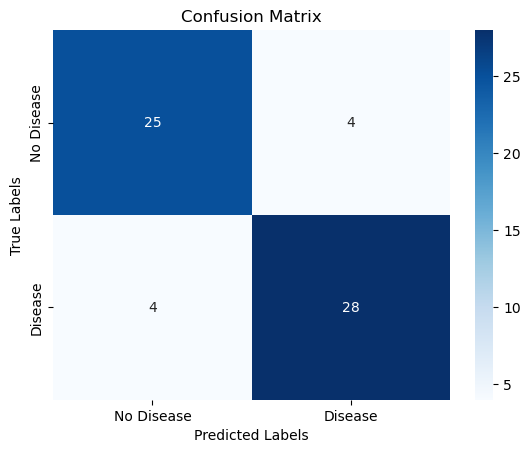

In [99]:
# show confusion matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])

# Set the plot labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


###
- True Positive (TP): 25 - The model correctly predicted that 25 people had heart disease.
- False Positive (FP): 4 - The model predicted that 4 people had heart disease, but they actually did not.
- False Negative (FN): 4 - The model predicted that 4 people did not have heart disease, but they actually did.
- True Negative (TN): 28 - The model correctly predicted that 28 people did not have heart disease.
    
- In summary, the model had 25 true positive predictions, meaning it correctly identified 25 people who had heart disease, and had 28 true negative predictions, meaning it correctly identified 28 people who did not have heart disease. However, it had 4 false positive predictions, meaning it incorrectly identified 4 people as having heart disease when they did not, and had 4 false negative predictions, meaning it incorrectly identified 4 people as not having heart disease when they actually did.

- Overall, the model seems to perform relatively well, with high accuracy, precision, recall and F1 score. However, it may be important to consider the implications of false negatives and false positives in this particular application, and to further optimize the model if necessary.


## Random Forest



In [100]:
# Build the model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2, label, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable using the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.8688524590163934
Confusion Matrix:
 [[24  5]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [102]:
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))

accuracy:  0.8688524590163934
recall:  0.90625
precision:  0.8529411764705882
F1 score:  0.8787878787878787


###
- This random forest model has an accuracy of 0.869, which means that it correctly predicted the outcome 86.9% of the time. The recall score of 0.906 suggests that the model correctly identified 90.6% of the positive cases (those with heart disease) in the dataset. The precision score of 0.853 means that when the model predicts that a patient has heart disease, it is correct 85.3% of the time. The F1 score of 0.879 is a harmonic mean of precision and recall, and it represents an overall measure of the model's accuracy. Overall, these metrics suggest that the random forest model is performing well in predicting heart disease cases.

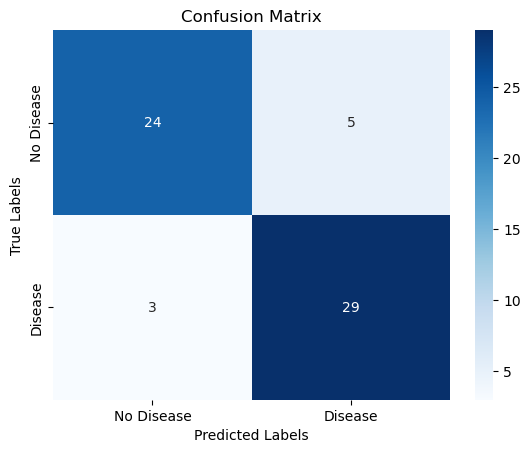

In [101]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])

# Set the plot labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

###
-The confusion matrix shows the following:

- 24 true positives (actual positive cases that were predicted as positive)
- 5 false negatives (actual positive cases that were predicted as negative)
- 3 false positives (actual negative cases that were predicted as positive)
- 29 true negatives (actual negative cases that were predicted as negative)

-In other words, the model correctly predicted 24 out of 29 positive cases and 29 out of 34 negative cases. However, it incorrectly classified 5 positive cases as negative and 3 negative cases as positive. 


## Testing and comparing 8 different algorithms at the same time

In [119]:

# testing 8 different algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df2, label, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC())
]

# Train and evaluate each model
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Compute the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the results
    print(f"{name}:\nAccuracy: {accuracy*100:.1f}%\nRecall: {recall*100:.1f}%\nPrecision: {precision*100:.1f}%\nF1 score: {f1*100:.1f}%\n")



Logistic Regression:
Accuracy: 85.2%
Recall: 84.4%
Precision: 87.1%
F1 score: 85.7%

Decision Tree:
Accuracy: 82.0%
Recall: 71.9%
Precision: 92.0%
F1 score: 80.7%

Random Forest:
Accuracy: 85.2%
Recall: 87.5%
Precision: 84.8%
F1 score: 86.2%

Gradient Boosting:
Accuracy: 78.7%
Recall: 78.1%
Precision: 80.6%
F1 score: 79.4%

AdaBoost:
Accuracy: 80.3%
Recall: 75.0%
Precision: 85.7%
F1 score: 80.0%

K-Nearest Neighbors:
Accuracy: 90.2%
Recall: 87.5%
Precision: 93.3%
F1 score: 90.3%

Gaussian Naive Bayes:
Accuracy: 86.9%
Recall: 84.4%
Precision: 90.0%
F1 score: 87.1%

Support Vector Machine:
Accuracy: 86.9%
Recall: 84.4%
Precision: 90.0%
F1 score: 87.1%



###
- Based on the performance metrics of the different algorithms, it seems that K-Nearest Neighbors (KNN) is the best algorithm for this dataset. KNN has the highest accuracy of 90.2%, the highest precision of 93.3%, and the highest F1 score of 90.3%. However, its recall score is slightly lower than some of the other algorithms at 87.5%.

- Logistic Regression, Random Forest, Gaussian Naive Bayes, and Support Vector Machine all have very similar performance metrics, with accuracy scores ranging from 85.2% to 86.9% and F1 scores ranging from 85.7% to 87.1%. However, their precision and recall scores differ slightly.

- Decision Tree and Gradient Boosting have lower accuracy scores than the other algorithms, with scores of 82.0% and 78.7%, respectively. However, Decision Tree has the highest precision score of 92.0%, while Gradient Boosting has the lowest F1 score of 79.4%.

- In summary, K-Nearest Neighbors appears to be the best algorithm for this dataset based on its high accuracy, precision, and F1 score. However, other algorithms such as Logistic Regression, Random Forest, Gaussian Naive Bayes, and Support Vector Machine also perform well and could be considered depending on the specific needs of the analysis.






## Confusion Matrices for the algorithms

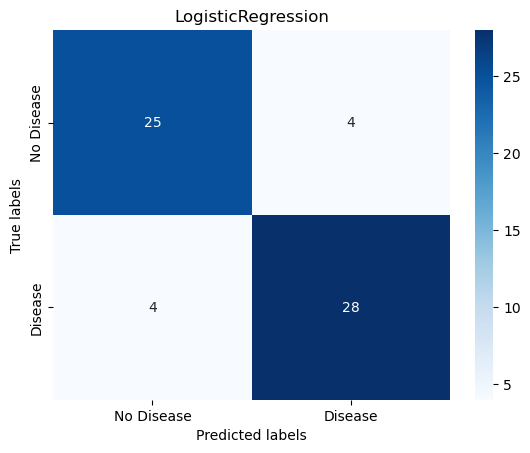

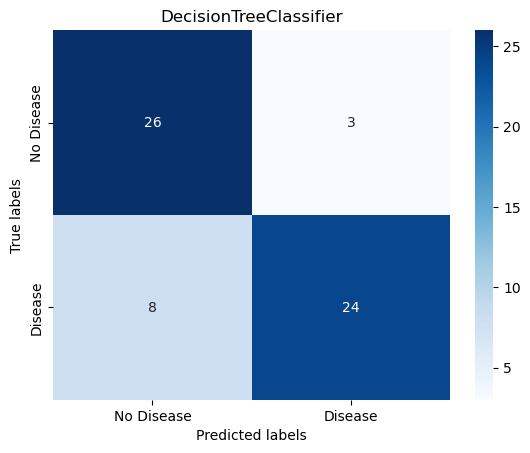

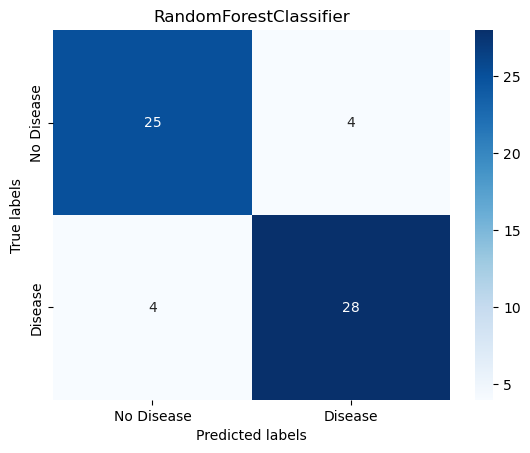

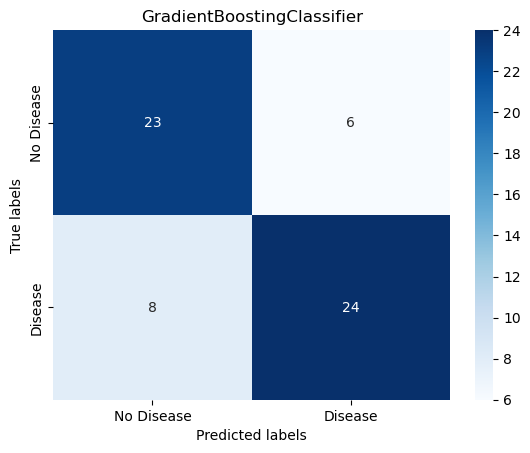

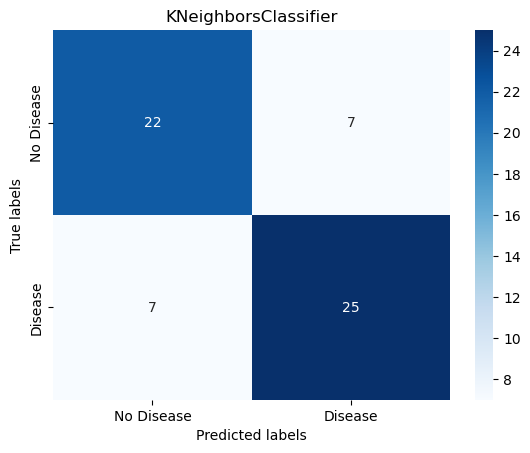

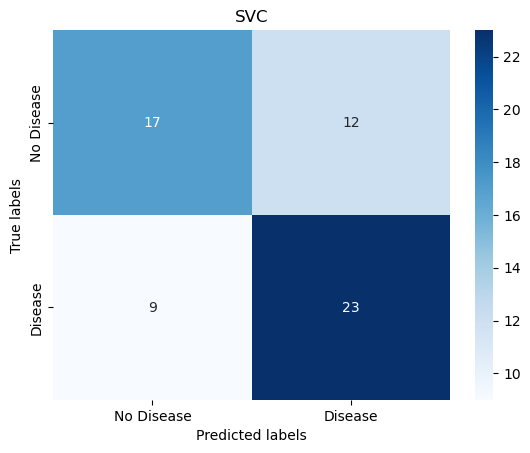

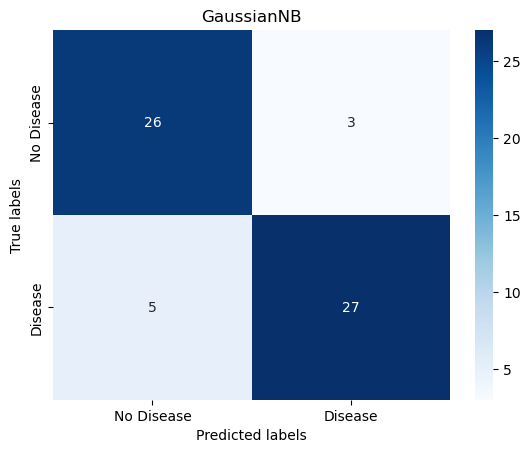

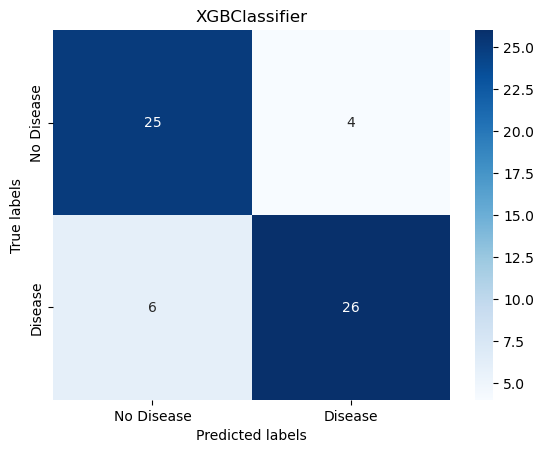

In [125]:
# Visualize the confusion matrix for each algorithm

# Define the list of classifiers to test
classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), 
               GradientBoostingClassifier(), KNeighborsClassifier(), SVC(), GaussianNB(), 
               XGBClassifier()]

# Loop through each classifier and fit the model
for classifier in classifiers:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df2, label, test_size=0.2, random_state=42)

    # Fit the model
    clf = classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using seaborn
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(classifier.__class__.__name__)
    plt.show()


###
- The SVC model performed the worst while the best looking are the logistic regression and the random forest models based on the fact that they have the lowest values of False Negative, meaning predicting No heart disease when there was actually heart Disease.


# THANK YOU FOR YOUR TIME
I hope this was Insightful

## BY MUHAMMAD SULEMAN
   Data Scientist